# Who is Pima Indians ?
#### "The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia



<img src='https://cdn.britannica.com/42/93542-050-E2B32DAB/women-Pima-shinny-game-field-hockey.jpg'/>

>> Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

What is diabetes ?
Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

What are the different types of diabetes? The most common types of diabetes are type 1, type 2, and gestational diabetes.

Type 1 diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

Type 2 diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

Gestational diabetes Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

# Objective

> We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Data

> 🌐 Data
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

# Load Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabtete/diabetes.csv')

## Overview of data

In [3]:
#Top 5 Dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


>> It shows that there are eight independent variables (Pregnancies,Glucose,Blood Pressure , SkinThickness ,Insulin, BMI, DiabetesPedigreeFunction, Age) and one dependent variable (Outcome).

In [4]:
#Display the last 5 dataset

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#Shape of the data 

df.shape

(768, 9)

In [6]:
#Info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


>> It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

In [7]:
#Five Point summary of the data 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Handling the Missing Values 

In [8]:
# To check the missing values in the dataset

df.isnull().values.any()

False

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [11]:
## Missing values

Missing Value Treatment
Missing data in the data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

By analysing the above details of the dataset found that few features have zero values and pregnancy variable has maximum = 17 which seems to be impossible.

These column values of zero do not make sense as there is some range for a normal healthy human being which is certainly not the zero and thus indicates a missing value.

Below variables have an invalid zero value:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

Initially we will replace these zeros with NaN so that it will easy to count the missing values. Then, later on, we will replace them with appropriate values.

In [12]:
#Replace 0 to NaN

d=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [13]:
# Find the number of Missing values

d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

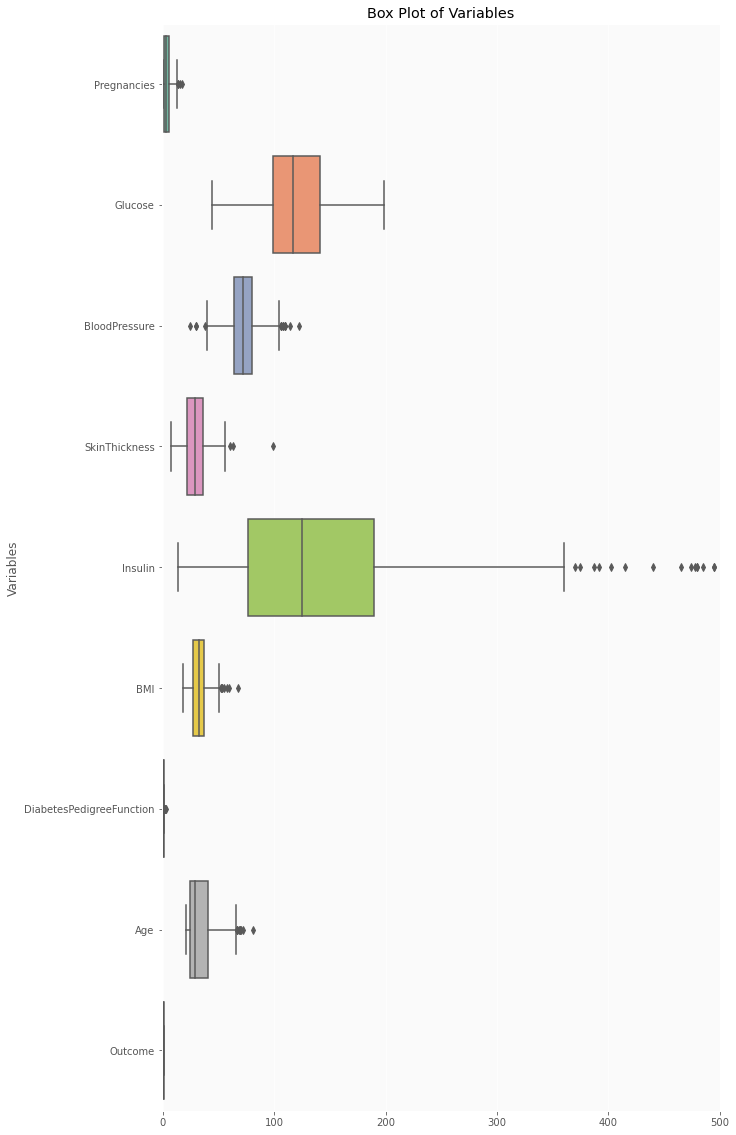

In [14]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(10, 20))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-1, 500))
plt.ylabel('Variables')
plt.title("Box Plot of Variables")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

From the above information we can make the following obserevations for the attributes

* The max Pregnacies is 17 which is quite an outlier.
* The Glucose data is normally distributed.
* Blood Pressure is also normally distributed with a considerable number of outliers but still is not skewed.
* Skin Thickness is positvely skewed with some outliers.
* Insulin also has considerable number of outliers with abnormal values around 800 and is positively skewed.
* BMI also has few outliers and is positively skewed.
* DiabetesPedigreeFunction is also highly positively skewed with few outliers.
* Age data has very few outliers.

In [15]:
## Many of the attributes have significant outliers so we shall replace the missing values with the median by target, instead of the mean.

In [16]:
#Replace NaN to mean value to explore dataset

df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Data visualization

In [17]:
# Analysing the Outcome

# To get the number of diabetic and Healthy person

outcome = df.groupby('Outcome').size()

In [18]:
outcome

Outcome
0    500
1    268
dtype: int64

>> The Data is biased towards people who are non-diabetics

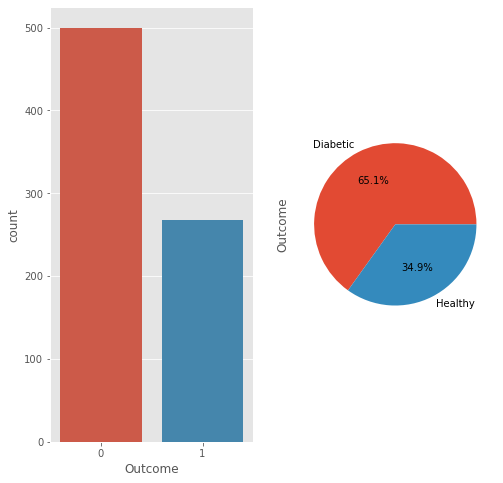

In [19]:
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(df['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

df.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%')
plt.show()

## The first plot shows the count values of the outcome and second pieplot shows that 65.1% people are diabetic and 34.9% people are Healthy

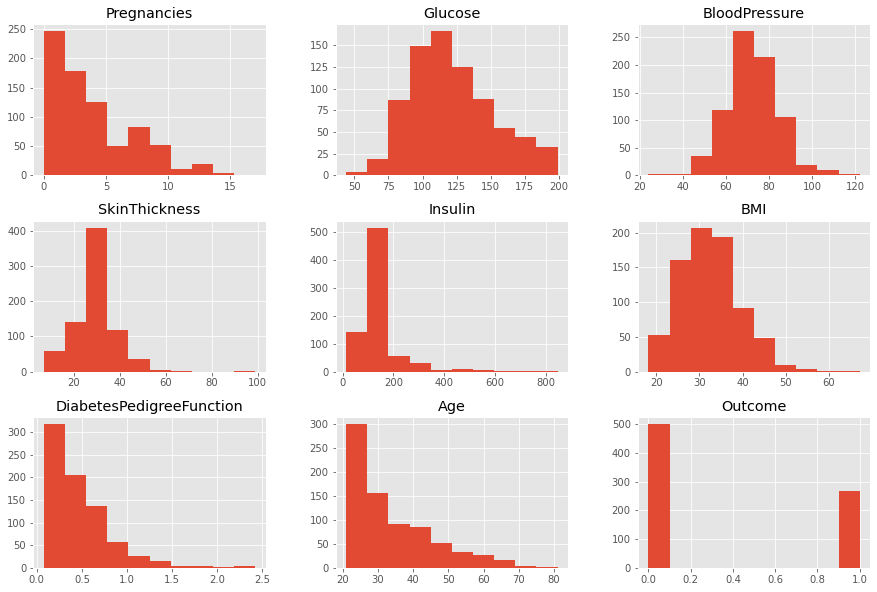

In [20]:
# Histogram 

df.hist(figsize=(15,10))
plt.show()

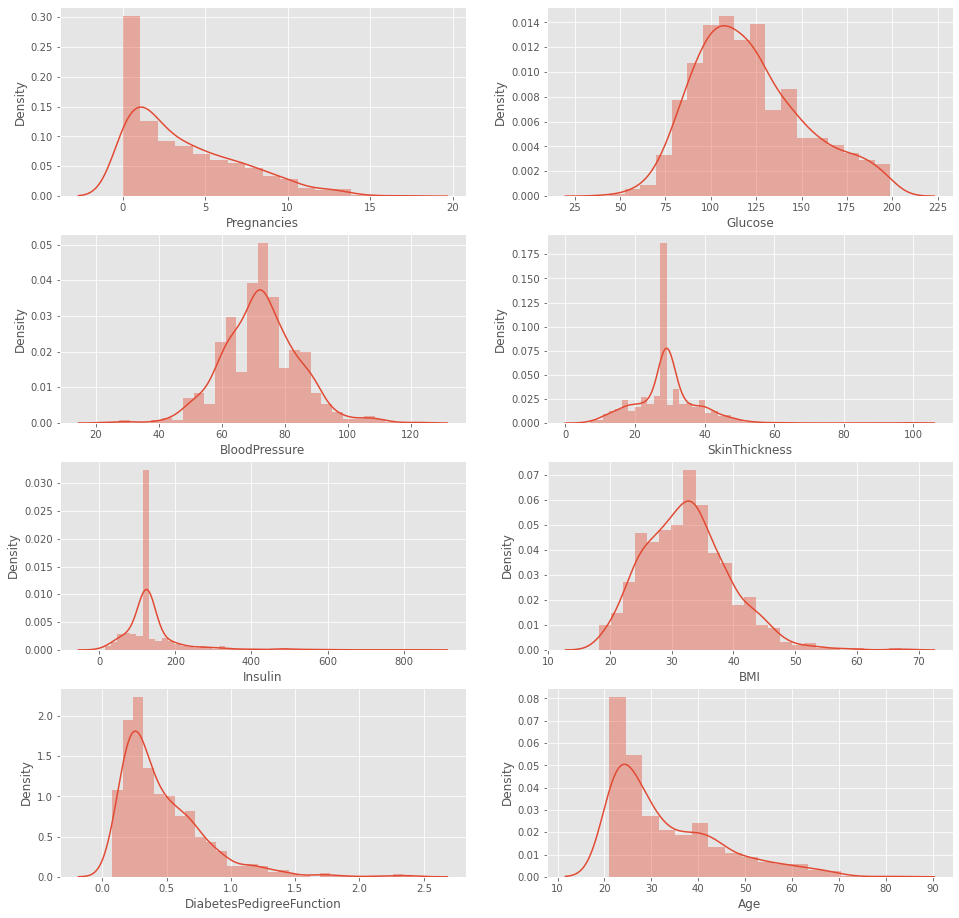

In [21]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(df['Age'],ax=ax2[3][1])
plt.show()

## The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.

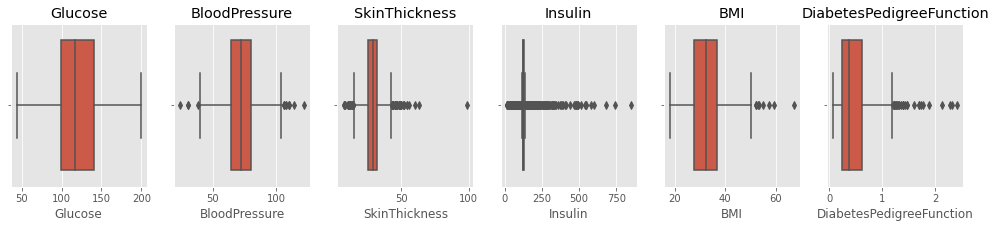

In [22]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

### We have replaced the '0' value to median of the parameters. The plot shows outliers present in the dataset.BloodPressure,SkinThickness,Insulin,BMI have outliers.It is clearly visible in the boxplots.

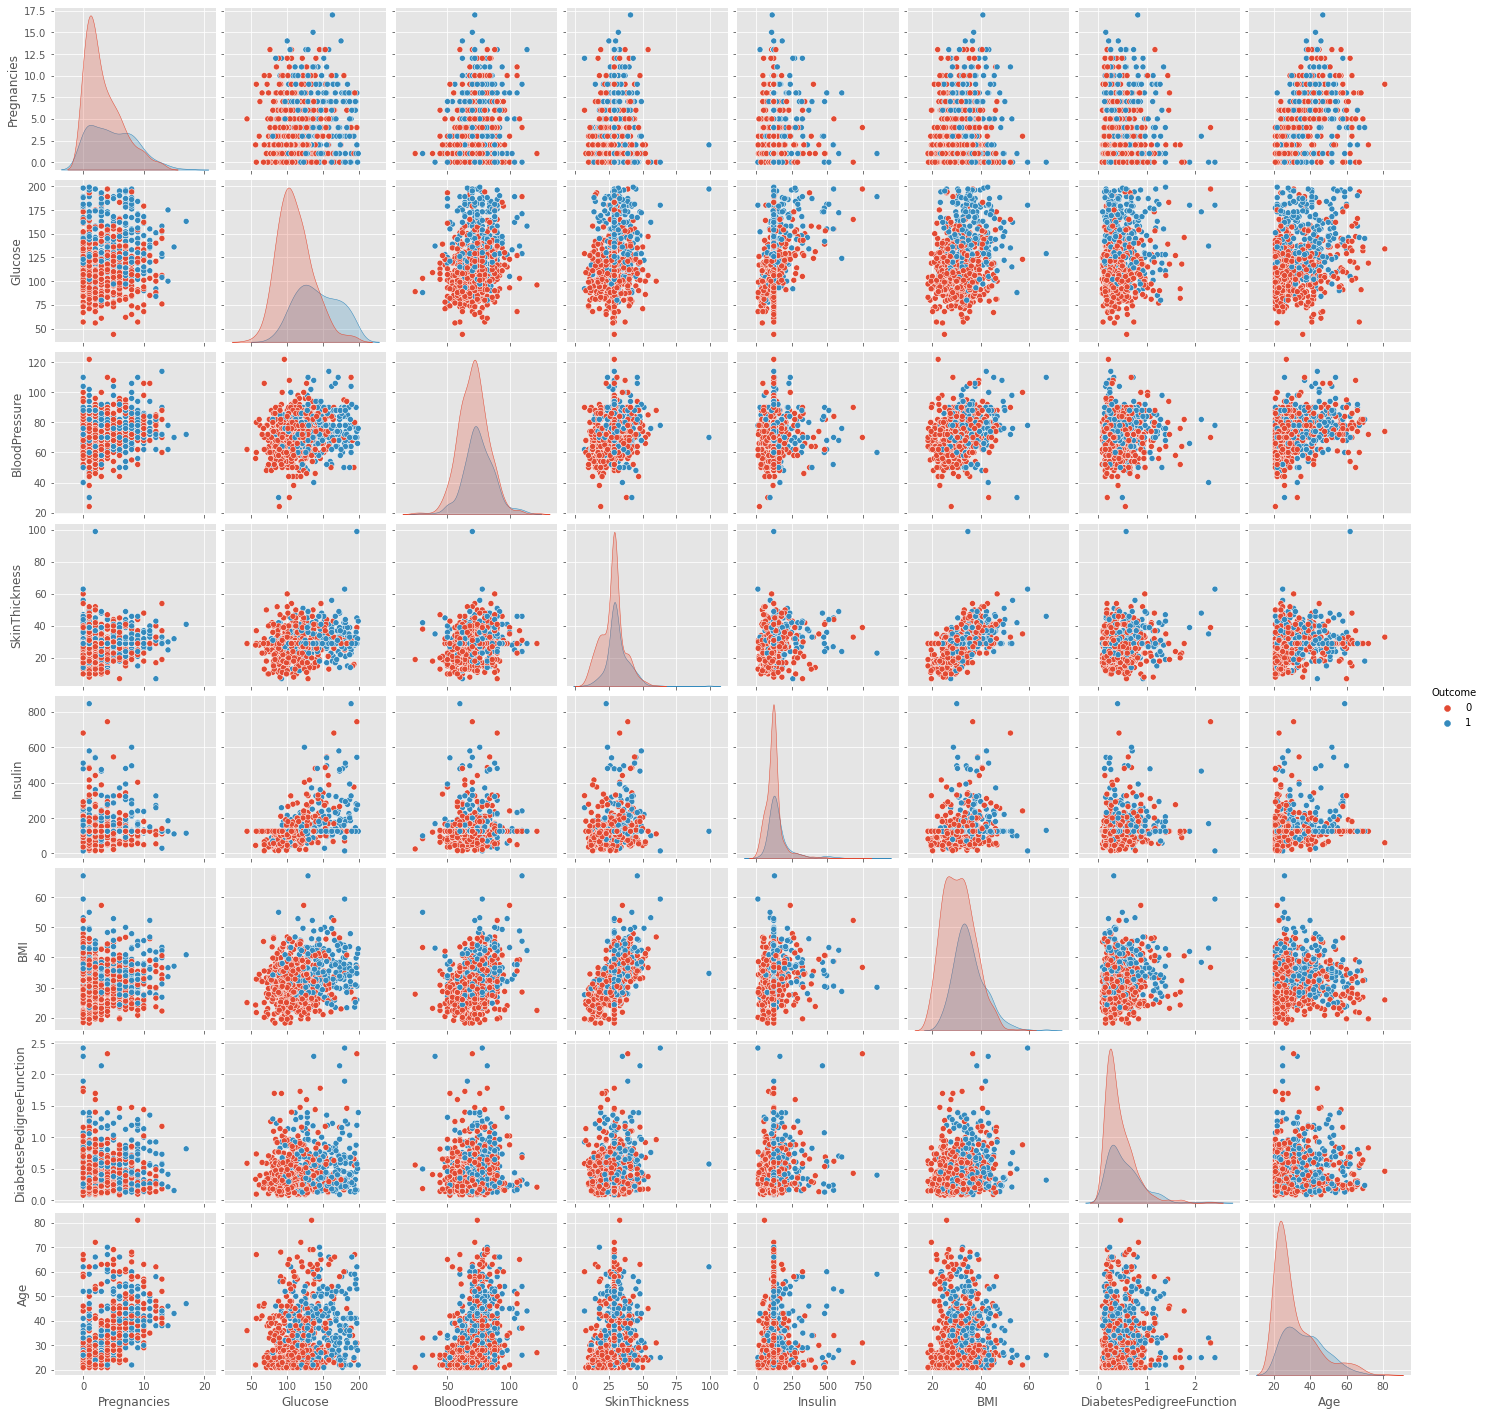

In [23]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(df,hue='Outcome')

### The plot shows that there is some relationship between parameters. Outcome is added as hue. We see that blue and orange dots are overlap. Also,

* Pregnancies and age have some kind of a linear line.
* BloodPressure and age have little relation. Most of the aged people have BloodPressure.
* Insulin and Glucose have some relation.

In [24]:
# corrlation matrix 

cor=df.corr()['Outcome'].sort_values(ascending=False)
cor


Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

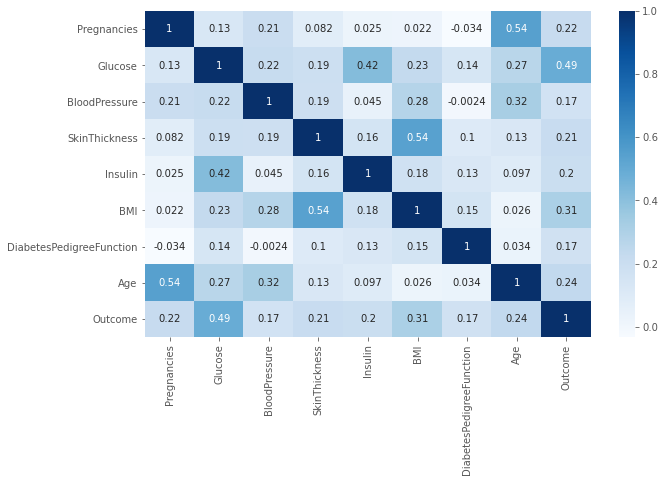

In [25]:
# correlation plot---heatmap
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()


## The correlation plot shows the relation between the parameters.

* Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.
* Insulin and DiabetesPedigreeFunction have little correlation with the outcome.
* BloodPressure and SkinThickness have tiny correlation with the outcome.
* There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

# Bivariate Analysis Against the Outcome

In [26]:
## Analysize of 'Age' Number

In [27]:
#Find the number of diabetic person in each age group

data1=df[df['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

,Outcome
Age,
21,5
22,11
23,7
24,8
25,14


In [28]:
# Percentage of diabetic Person in each age group

data2=df.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
Age,,
21,5,7.936508
22,11,15.277778
23,7,18.421053
24,8,17.391304
25,14,29.166667
26,8,24.242424
27,8,25.000000
28,10,28.571429
29,13,44.827586


>> It shows that 48% people are Diabetic in the age group of 31-40 and 59% people diabetic in the age group of 41-55.It depicts that the percentage of diabetic people in these age group is higher than the other age group.

<AxesSubplot:xlabel='Age', ylabel='Diabetic %'>

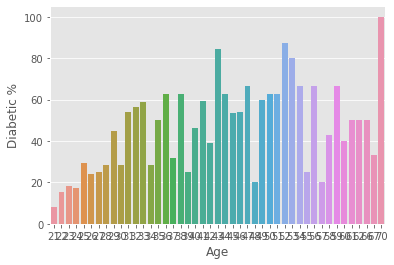

In [29]:
sns.barplot(data1.index,data1['Diabetic %'])

### It is evident from the barplot that percentage of women diagnosed with diabetic are in the age group between '31-55'. It means that the middle aged women are most likely to be diabetic than young or old women.

In [30]:
## Analysis of 'Pregnancies' parameter

In [31]:
#Crosstab gives the fregency table information ----Pregnancies

pd.crosstab(df['Pregnancies'],df['Outcome'])

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


In [32]:
##Identify Noise in the Data and Type of Noise

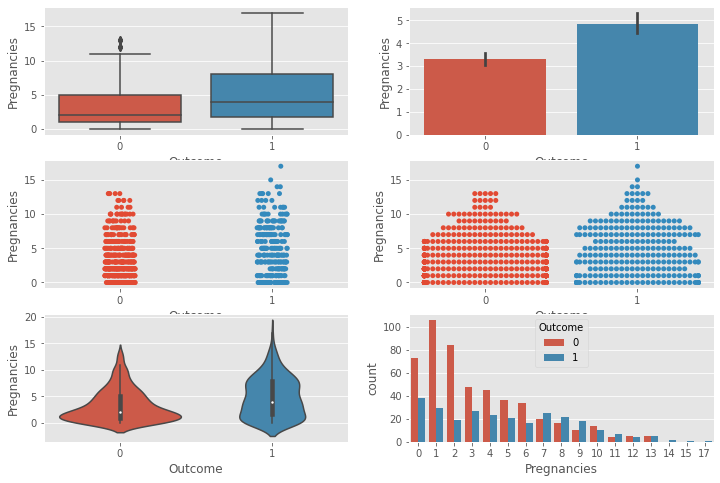

In [33]:
# Categorical vs Continuous ----Outcome vs Pregnancies

fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Pregnancies'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Pregnancies'], ax=ax2[1][1])
sns.violinplot(df['Outcome'], df['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=df,ax=ax2[2][1])
plt.show()

## The plots show that pregnant people have more chance of diabeties.

In [34]:
##Analysis of 'Glucose' parameter

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

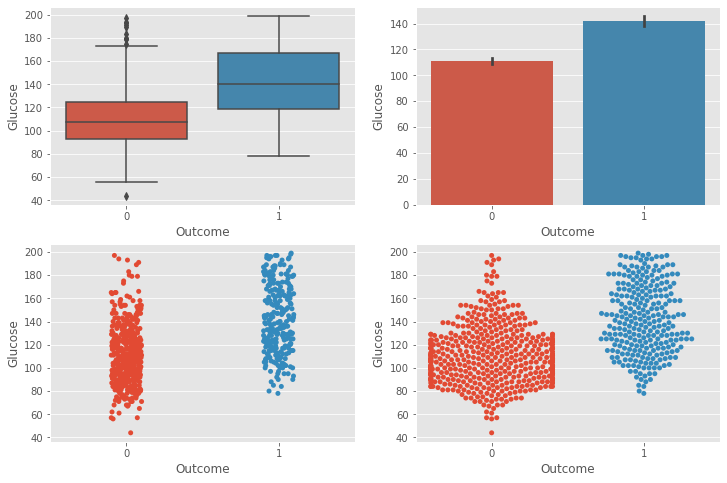

In [35]:
# Categorical vs Continuous ---- Outcome vs Glucose 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Glucose'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Glucose'], ax=ax2[1][1])

In [36]:
##Analysis of 'BloodPressure' parameter

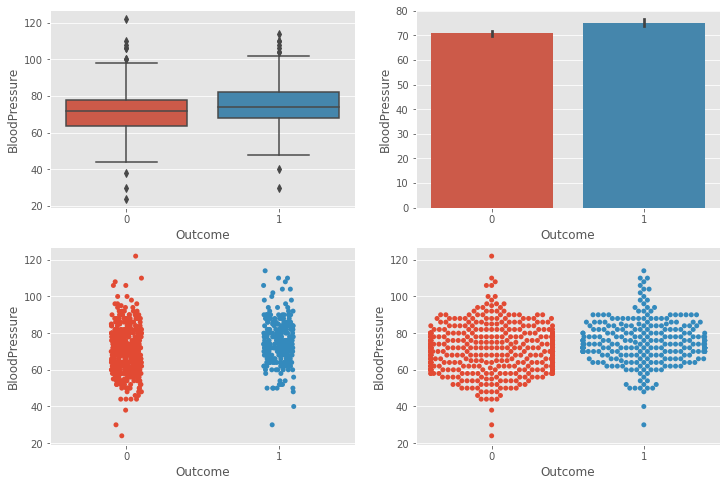

In [37]:
# Categorical vs Continuous ---- Outcome vs BloodPressure

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BloodPressure'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BloodPressure'], ax=ax2[1][1])
plt.show()

In [38]:
##Analysis of 'SkinThickness' parameter

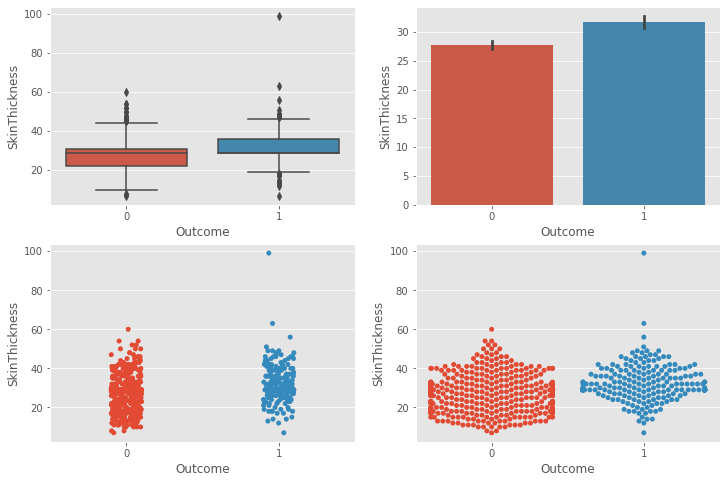

In [39]:
# Categorical vs Continuous ----Outcome vs SkinThickness  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['SkinThickness'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['SkinThickness'], ax=ax2[1][1])
plt.show()

In [40]:
##Analysis of 'Insulin' parameter

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

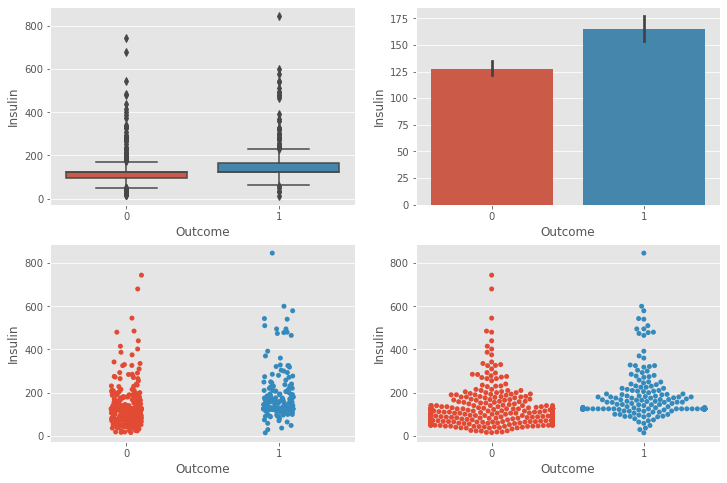

In [41]:
# Categorical vs Continuous ----Outcome vs Insulin  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['Insulin'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['Insulin'], ax=ax2[1][1])

In [42]:
##Analysis of 'BMI' parameter

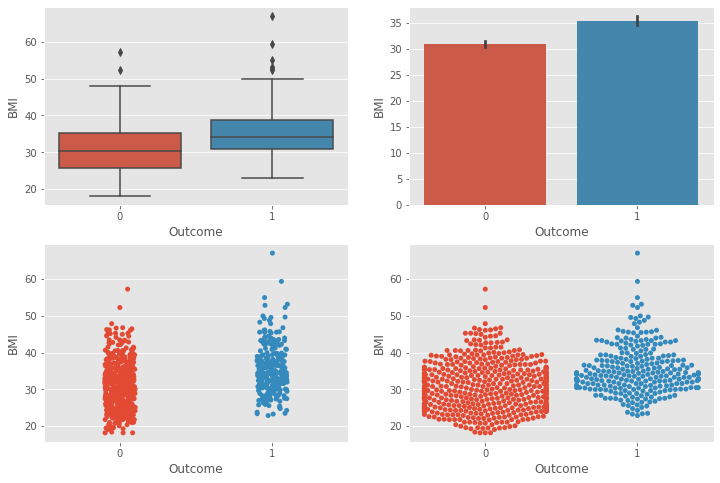

In [43]:
# Categorical vs Continuous ----Outcome vs BMI

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['BMI'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['BMI'], ax=ax2[1][1])
plt.show()

In [44]:
##Analysis of 'DiabetesPedigreeFunction' parameter

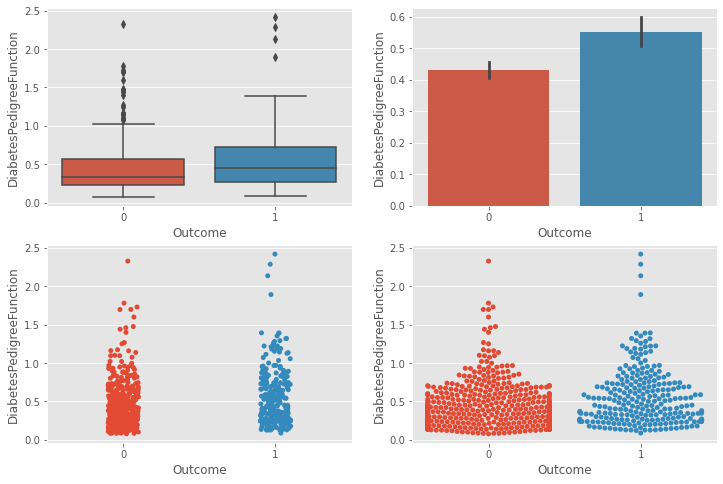

In [45]:
# Categorical vs Continuous ----Outcome vs DiabetesPedigreeFunction

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df,ax=ax2[0][0])
sns.barplot(df['Outcome'], df['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(df['Outcome'], df['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(df['Outcome'], df['DiabetesPedigreeFunction'], ax=ax2[1][1])
plt.show()

# Analysis of each parameter with each respect to each other

In [46]:
##Analysis of 'Age' and 'Pregnancies

In [47]:
dataset = pd.read_csv('diabtete/diabetes.csv')

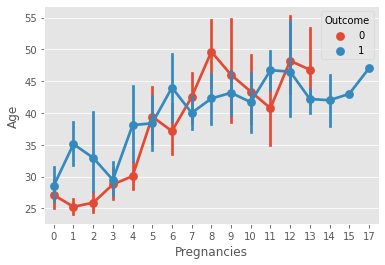

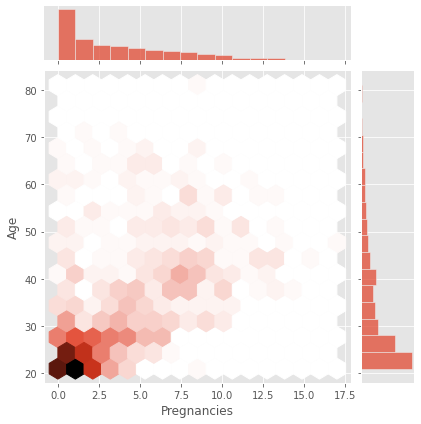

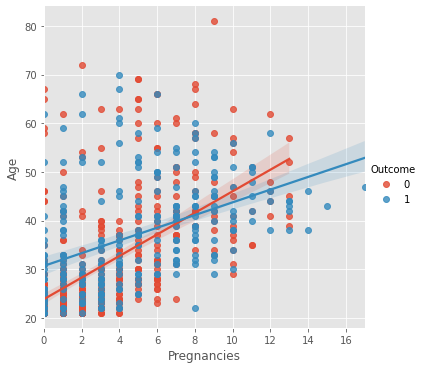

In [48]:
# lmplot---linear Regression plots
sns.pointplot(dataset['Pregnancies'], dataset['Age'], hue=df['Outcome'])
sns.jointplot(dataset['Pregnancies'], dataset['Age'], kind='hex')
sns.lmplot(x='Pregnancies',y='Age',data=dataset,hue='Outcome')


In [49]:
##Analysis of 'Insulin' and 'SkinThickness

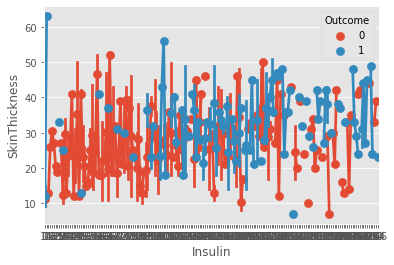

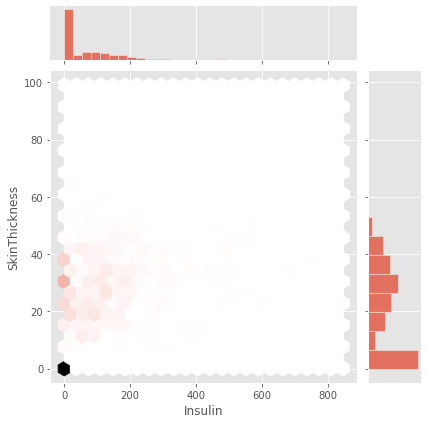

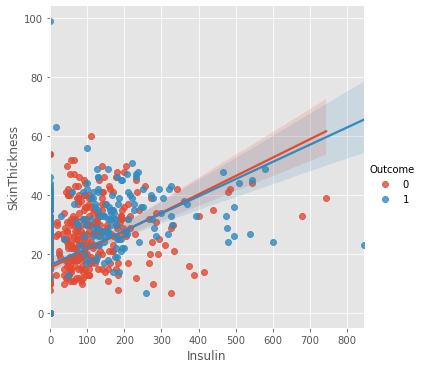

In [50]:
sns.pointplot(dataset['Insulin'], dataset['SkinThickness'], hue=dataset['Outcome'])
sns.jointplot(dataset['Insulin'], dataset['SkinThickness'], kind='hex')
sns.lmplot(x='Insulin',y='SkinThickness',data=dataset,hue='Outcome')

In [51]:
#Analysis of BMI and SkinThickness

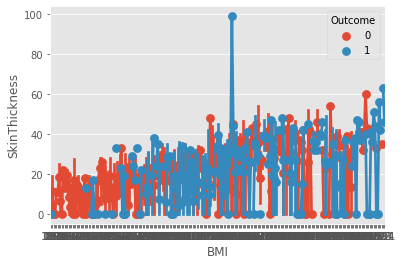

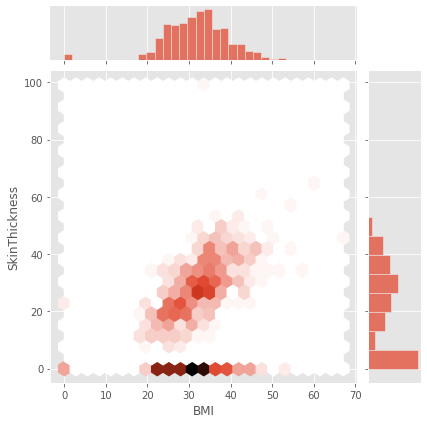

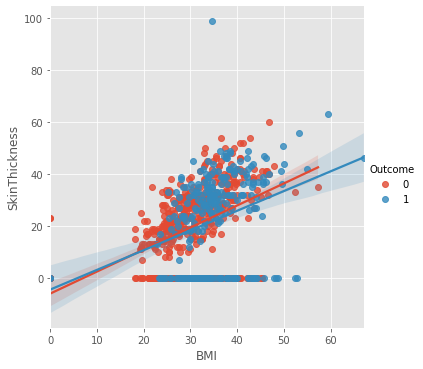

In [52]:
sns.pointplot(dataset['BMI'], dataset['SkinThickness'], hue=dataset['Outcome'])
sns.jointplot(dataset['BMI'], dataset['SkinThickness'], kind='hex')
sns.lmplot(x='BMI',y='SkinThickness',data=dataset,hue='Outcome')

In [53]:
# Analysis of Insulin and Glucose

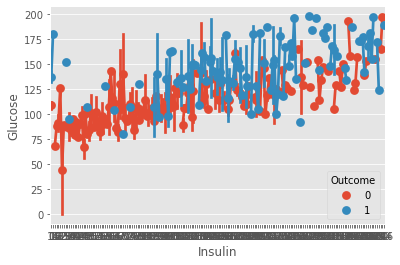

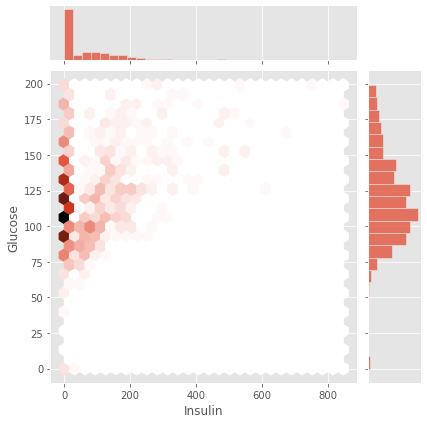

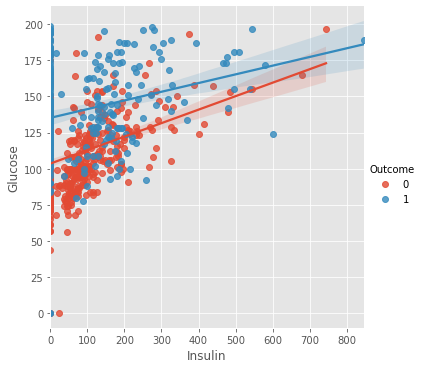

In [54]:
sns.pointplot(dataset['Insulin'], dataset['Glucose'], hue=dataset['Outcome'])
sns.jointplot(dataset['Insulin'], dataset['Glucose'], kind='hex')
sns.lmplot(x='Insulin',y='Glucose',data=dataset,hue='Outcome')

## Observations

* The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).
* BMI and DiabetesPedigreeFunction are a float data type and other parameters are integer data type.
* The parameters do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values.
* The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.
* The parameters Glucose, BloodPressure, BMI are normally distributed. Pregnancies,Insulin,Age,DiabetesPedigreeFunction are rightly skewed.
* The missing values '0' is replaced by the mean of the parameter to explore the dataset.
* BloodPressure,SkinThickness,Insulin,BMI have outliers.
* There are no convincing relationship between the parameters.Pregnancies and age have some kind of a linear line. BloodPressure and age have little relation. Most of the aged people have BloodPressure.Insulin and Glucose have some relation.
* Glucose, Age BMI and Pregnancies are the most Correlated features with the Outcome.Insulin and DiabetesPedigreeFunction have little correlation with the outcome. BloodPressure and SkinThickness have tiny correlation with the outcome.
* Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose are little correlated.
* The midle aged women are most likely to be diabetic than the young women. As the percentage of diabetic women are 48% and 59% in the age group of 31-40 and 41-55.
* After Pregnancy people have more chance of diabeties.
* People with high Glucose level are more likely to have diabeties.
* People with high BloodPressure have more chance of diabeties.
* People with high Insulin level are more likely to have Diabetes.

In [55]:
## Feature Engineering & Selection

We need to add important features to the dataset discover some effective features before training the data to machine learning models.

Feature 1 : BMI Descriptor Adding BMI Descriptor feature as we know all the participants were adult female. The features are encoded as below BMI

* Under - Under 18.5 – are considered underweight and possibly malnourished.
* Healthy - 18.5 to 24.9 – are within a healthy weight range for young and middle-aged adults.
* OverWeight - 25.0 to 29.9 – are considered overweight.
* Obese - Over 30 – are considered obese.

In [56]:
def set_bmi(x):
    if x < 18.5:
        return "Under Weight"
    elif x >= 18.5 and x <= 24.9:
        return "Healthy"
    elif x >= 25 and x <= 29.9:
        return "Over Weight"
    elif x >= 30:
        return "Obese"

In [57]:
df["BMI_CAT"] = df.BMI.apply(set_bmi)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Over Weight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over Weight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese


Feature 2:

* Insulin Indicative Range If insulin level (2-Hour serum insulin (mu U/ml)) is >= 16 and <= 166, then it is normal range else it is considered as Abnormal.

In [58]:
def set_insulin(x):
    # Normal
    if x >= 16 and x <= 166:
        return "Normal"
    # Abnormal
    else:
        return "Abnormal"

In [59]:
df["INSULIN_CAT"] = df.Insulin.apply(set_insulin)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,INSULIN_CAT
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Over Weight,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Healthy,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over Weight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Abnormal


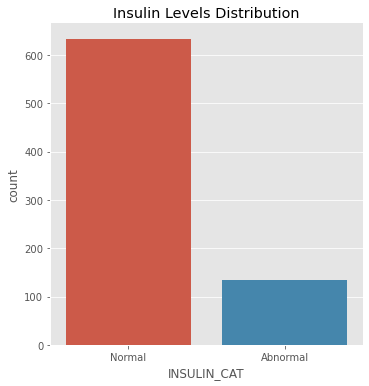

In [60]:
ax = sns.catplot(x="INSULIN_CAT", kind="count", data=df).set(title = "Insulin Levels Distribution");

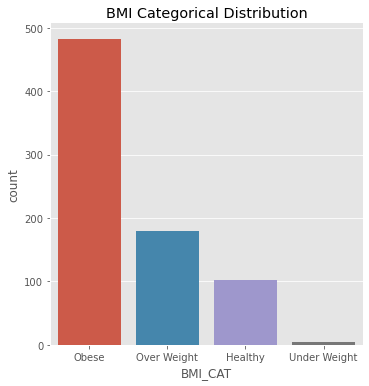

In [61]:
ax = sns.catplot(x="BMI_CAT", kind="count", data=df).set(title = "BMI Categorical Distribution");

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,INSULIN_CAT
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Over Weight,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Healthy,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Over Weight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Abnormal


In [63]:
df.drop(labels=['BMI','Insulin'],axis=1,inplace=True)

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,INSULIN_CAT
0,6,148.0,72.0,35.0,0.627,50,1,Obese,Normal
1,1,85.0,66.0,29.0,0.351,31,0,Over Weight,Normal
2,8,183.0,64.0,29.0,0.672,32,1,Healthy,Normal
3,1,89.0,66.0,23.0,0.167,21,0,Over Weight,Normal
4,0,137.0,40.0,35.0,2.288,33,1,Obese,Abnormal


In [65]:
Bmi = pd.get_dummies(df['BMI_CAT'],drop_first=True)

In [66]:
Insulin = pd.get_dummies(df['INSULIN_CAT'],drop_first=True)

In [67]:
df = pd.concat([df,Bmi,Insulin],axis=1)

In [68]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,BMI_CAT,INSULIN_CAT,Obese,Over Weight,Under Weight,Normal
0,6,148.0,72.0,35.0,0.627,50,1,Obese,Normal,1,0,0,1
1,1,85.0,66.0,29.0,0.351,31,0,Over Weight,Normal,0,1,0,1
2,8,183.0,64.0,29.0,0.672,32,1,Healthy,Normal,0,0,0,1
3,1,89.0,66.0,23.0,0.167,21,0,Over Weight,Normal,0,1,0,1
4,0,137.0,40.0,35.0,2.288,33,1,Obese,Abnormal,1,0,0,0


In [69]:
df.drop(labels=['BMI_CAT','INSULIN_CAT'],axis=1,inplace=True)

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,Obese,Over Weight,Under Weight,Normal
0,6,148.0,72.0,35.0,0.627,50,1,1,0,0,1
1,1,85.0,66.0,29.0,0.351,31,0,0,1,0,1
2,8,183.0,64.0,29.0,0.672,32,1,0,0,0,1
3,1,89.0,66.0,23.0,0.167,21,0,0,1,0,1
4,0,137.0,40.0,35.0,2.288,33,1,1,0,0,0


In [71]:
## Building model without feature extraction and data balancing

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [76]:
rf = RandomForestClassifier()

In [77]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_predict = rf.predict(X_test)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.65      0.63      0.64        49

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



#### Since we know that our target variable is not balanced and imbalanced data is a kind of anomaly in our model.The features of minority class are treated as noise and are often ignored. Hence, there is a high probability of misclassification of the minority class as compared to majority class.

#### Hence, the main objective of balancing classes is to either increasing the frequency of the minority or decreasing the frequency of the majority class.

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
print(f'Before taking sampling,the distribution of Outcomes:')
print(df.Outcome.value_counts())

Before taking sampling,the distribution of Outcomes:
0    500
1    268
Name: Outcome, dtype: int64


In [83]:
sm = SMOTE(random_state=42)

In [84]:
X,y = sm.fit_resample(X,y)

In [85]:
print(f'After sampling the data,the distribution of Outcomes:')
print(y.value_counts())

After sampling the data,the distribution of Outcomes:
1    500
0    500
Name: Outcome, dtype: int64


In [86]:
X.shape

(1000, 10)

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [88]:
from sklearn.preprocessing import RobustScaler

In [89]:
sc = RobustScaler()

In [90]:
X_train = sc.fit_transform(X_train)

In [91]:
X_test = sc.transform(X_test)

In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_predict = rf.predict(X_test)

In [94]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       124
           1       0.77      0.79      0.78       126

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



In [95]:
## Using different machine learning algorithms and comparing the best one

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [97]:
pipelines = []


In [98]:
pipelines.append(('Logistic Regression',LogisticRegression()))
pipelines.append(('Random Forest',RandomForestClassifier()))
pipelines.append(('Decision Tree',DecisionTreeClassifier()))
pipelines.append(('Gaussian NB',GaussianNB()))
pipelines.append(('KNN',KNeighborsClassifier()))
pipelines.append(('XGBOOST',XGBClassifier()))
pipelines.append(('LightGBM',LGBMClassifier()))

In [99]:
results,names = [],[]

In [100]:
train_results,train_names = [],[]

In [101]:
from sklearn.model_selection import KFold,cross_val_score

In [102]:
## train scores

In [103]:
for name,model in pipelines:
    kfold = KFold(n_splits=7,random_state=42,shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='precision',n_jobs=-1)
    print(' _ '*40)
    train_names.append(name)
    train_results.append(cv_results)
    print(f'The precision of model in train set',model,'is:',cv_results.mean())
    

 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in train set LogisticRegression() is: 0.7348157887367613
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in train set RandomForestClassifier() is: 0.789618510590378
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in train set DecisionTreeClassifier() is: 0.7468651011896353
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in train set GaussianNB() is: 0.5222999067563024
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in train set KNeighborsClassifier() is: 0.72210287623

In [104]:
train_names

['Logistic Regression',
 'Random Forest',
 'Decision Tree',
 'Gaussian NB',
 'KNN',
 'XGBOOST',
 'LightGBM']

In [105]:
train_results

[array([0.70212766, 0.76923077, 0.65079365, 0.65454545, 0.77272727,
        0.71428571, 0.88      ]),
 array([0.73469388, 0.87272727, 0.70967742, 0.78846154, 0.80357143,
        0.73684211, 0.88135593]),
 array([0.75      , 0.83018868, 0.66129032, 0.75510204, 0.71153846,
        0.70175439, 0.81818182]),
 array([0.51515152, 0.5047619 , 0.5       , 0.53061224, 0.51886792,
        0.46534653, 0.62135922]),
 array([0.62962963, 0.77192982, 0.73684211, 0.70175439, 0.75925926,
        0.61403509, 0.84126984]),
 array([0.70588235, 0.84482759, 0.72131148, 0.78431373, 0.8       ,
        0.69354839, 0.89090909]),
 array([0.72      , 0.84745763, 0.71666667, 0.78431373, 0.75471698,
        0.72413793, 0.9137931 ])]

In [106]:
train_scores =[]
def return_train_scores():
    for i in train_results:
        train_scores.append(i.mean())
    return train_scores
       
       

In [107]:
scores_train = return_train_scores()

In [108]:
scores_train

[0.7348157887367613,
 0.789618510590378,
 0.7468651011896353,
 0.5222999067563024,
 0.7221028762382146,
 0.7772560882934243,
 0.7801551478414773]

In [109]:
pd.DataFrame({'models':train_names,
              'train_scores':scores_train
             })

,models,train_scores
0,Logistic Regression,0.734816
1,Random Forest,0.789619
2,Decision Tree,0.746865
3,Gaussian NB,0.522300
4,KNN,0.722103
5,XGBOOST,0.777256
6,LightGBM,0.780155


In [110]:
## test_scores

In [111]:
test_results,test_names = [],[]

In [112]:
for name,model in pipelines:
    kfold = KFold(n_splits=7,random_state=42,shuffle=True)
    cv_results = cross_val_score(model,X_test,y_test,cv=kfold,scoring='precision',n_jobs=-1)
    print(' _ '*40)
    test_names.append(name)
    test_results.append(cv_results)
    print(f'The precision of model in test set',model,'is:',cv_results.mean())

 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in test set LogisticRegression() is: 0.7607051668875027
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in test set RandomForestClassifier() is: 0.810978649833139
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in test set DecisionTreeClassifier() is: 0.7053976551601687
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in test set GaussianNB() is: 0.5670068027210884
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
The precision of model in test set KNeighborsClassifier() is: 0.746785512624022


In [113]:
test_scores =[]
def return_test_scores():
    for i in test_results:
       test_scores.append(i.mean())
    return test_scores


In [114]:
scores_test = return_test_scores()

In [115]:
scores_test

[0.7607051668875027,
 0.810978649833139,
 0.7053976551601687,
 0.5670068027210884,
 0.746785512624022,
 0.7475990396158462,
 0.7582159179461259]

In [116]:
pd.DataFrame({'models':train_names,
              'test_scores':scores_test
             })

,models,test_scores
0,Logistic Regression,0.760705
1,Random Forest,0.810979
2,Decision Tree,0.705398
3,Gaussian NB,0.567007
4,KNN,0.746786
5,XGBOOST,0.747599
6,LightGBM,0.758216


In [117]:
## Full comparision

In [118]:
pd.DataFrame({'Models':train_names,
              'Train_scores':train_scores,
              'Test_scores':test_scores
             })

,Models,Train_scores,Test_scores
0,Logistic Regression,0.734816,0.760705
1,Random Forest,0.789619,0.810979
2,Decision Tree,0.746865,0.705398
3,Gaussian NB,0.522300,0.567007
4,KNN,0.722103,0.746786
5,XGBOOST,0.777256,0.747599
6,LightGBM,0.780155,0.758216


In [119]:
## Among these all RandomForest is the best model

In [120]:
## Hyperparameter tunings

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:

params = {'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}


In [147]:
rcv = RandomForestClassifier(bootstrap=False,
                             criterion='gini',
                             max_depth=40,
                             max_features=1,
                             min_samples_leaf=1,
                             min_samples_split=5,
                             n_estimators=500
                     
                             
                            )

In [148]:
rcv.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features=1,
                       min_samples_split=5, n_estimators=500)

In [149]:
# {'n_estimators': 1000,
#  'min_samples_split': 2,
#  'min_samples_leaf': 2,
#  'max_features': 4,
#  'max_depth': 80,
#  'criterion': 'entropy',
#  'bootstrap': False}

In [150]:
predictor = rcv.predict(X_test)

In [151]:
print(classification_report(y_test,predictor))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       124
           1       0.77      0.79      0.78       126

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



In [152]:
feature_importances = pd.DataFrame({'Attributes':X.columns,
              'Importances':rcv.feature_importances_
             })

In [153]:
feature_importances

,Attributes,Importances
0,Pregnancies,0.087687
1,Glucose,0.261812
2,BloodPressure,0.116178
3,SkinThickness,0.129546
4,DiabetesPedigreeFunction,0.139027
5,Age,0.165789
6,Obese,0.035209
7,Over Weight,0.031711
8,Under Weight,0.001995
9,Normal,0.031045


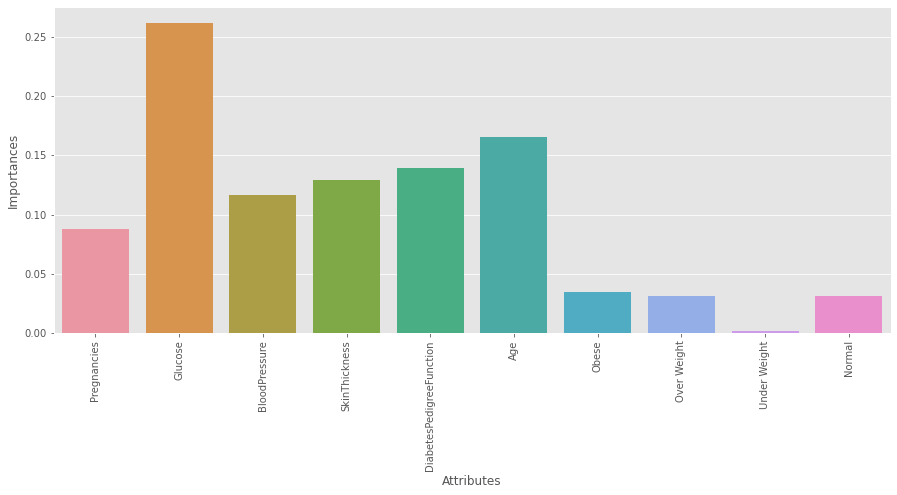

In [154]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Attributes',y='Importances',data=feature_importances)
plt.xticks(rotation=90)
plt.show()


In [155]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
Obese                       0.296609
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Under Weight               -0.052974
Over Weight                -0.145145
Normal                     -0.167279
Name: Outcome, dtype: float64

In [156]:
## Removing the highly correlated features

In [165]:
df.drop(labels=['SkinThickness','DiabetesPedigreeFunction','Under Weight'],axis=1,inplace=True)

KeyError: "['SkinThickness' 'DiabetesPedigreeFunction' 'Under Weight'] not found in axis"

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)

In [167]:
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [168]:
rcv.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features=1,
                       min_samples_split=5, n_estimators=500)

In [169]:
prediction = rcv.predict(X_test)

In [170]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.79      0.82      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
confusion_matrix(y_test,prediction)

array([[77, 22],
       [18, 83]], dtype=int64)

In [173]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'DiabetesPedigreeFunction', 'Age', 'Obese', 'Over Weight',
       'Under Weight', 'Normal'],
      dtype='object')